# Image Processing

## Import Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

## Lecture 2 **(Spatial Domain)**

### How computer see the image

RGB image shape: (400, 700, 3)


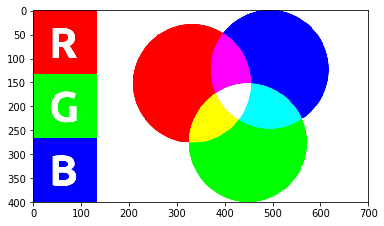

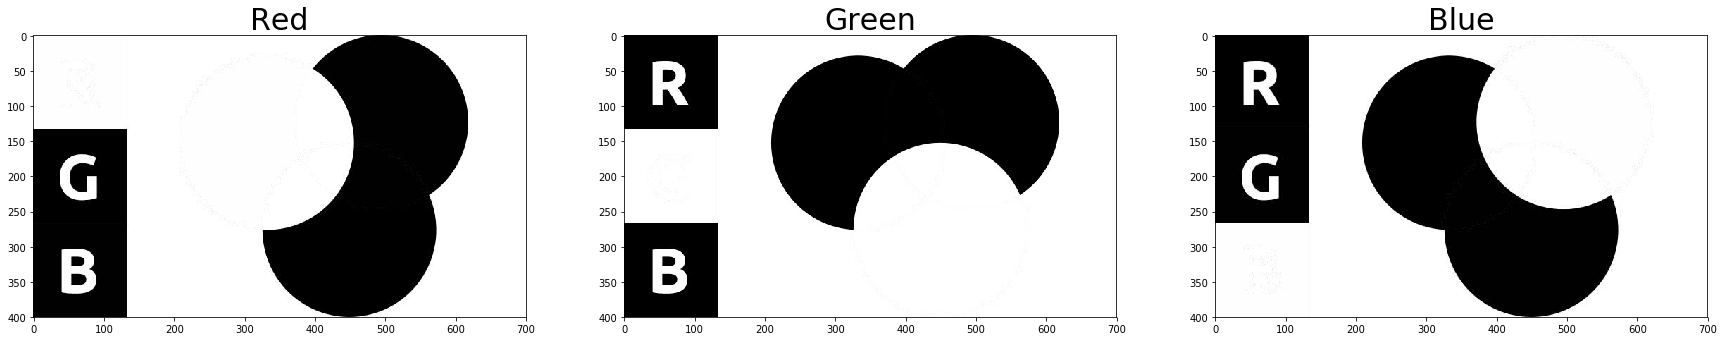

In [2]:
RGBimg=mpimg.imread('images/RGB.jpg')
plt.imshow(RGBimg)
print('RGB image shape:',RGBimg.shape)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(RGBimg[:,:,0], cmap='gray',vmin=0, vmax=255)
ax1.set_title('Red', fontsize=30)
ax2.imshow(RGBimg[:,:,1], cmap='gray',vmin=0, vmax=255)
ax2.set_title('Green', fontsize=30)
ax3.imshow(RGBimg[:,:,2], cmap='gray',vmin=0, vmax=255)
ax3.set_title('Blue', fontsize=30)
plt.show()

### This course deals with grayscale images
Let's transform the image to grayscale

gray image shape: (400, 700)


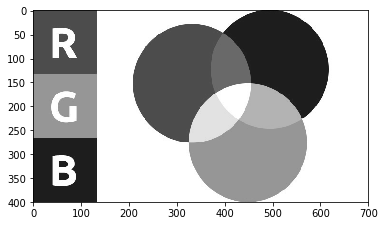

In [3]:
grayimg=cv2.cvtColor(RGBimg, cv2.COLOR_RGB2GRAY)
plt.imshow(grayimg, Cmap='gray',vmin=0, vmax=255)
print('gray image shape:',grayimg.shape)
plt.show()

#### Gray Levels Intuation

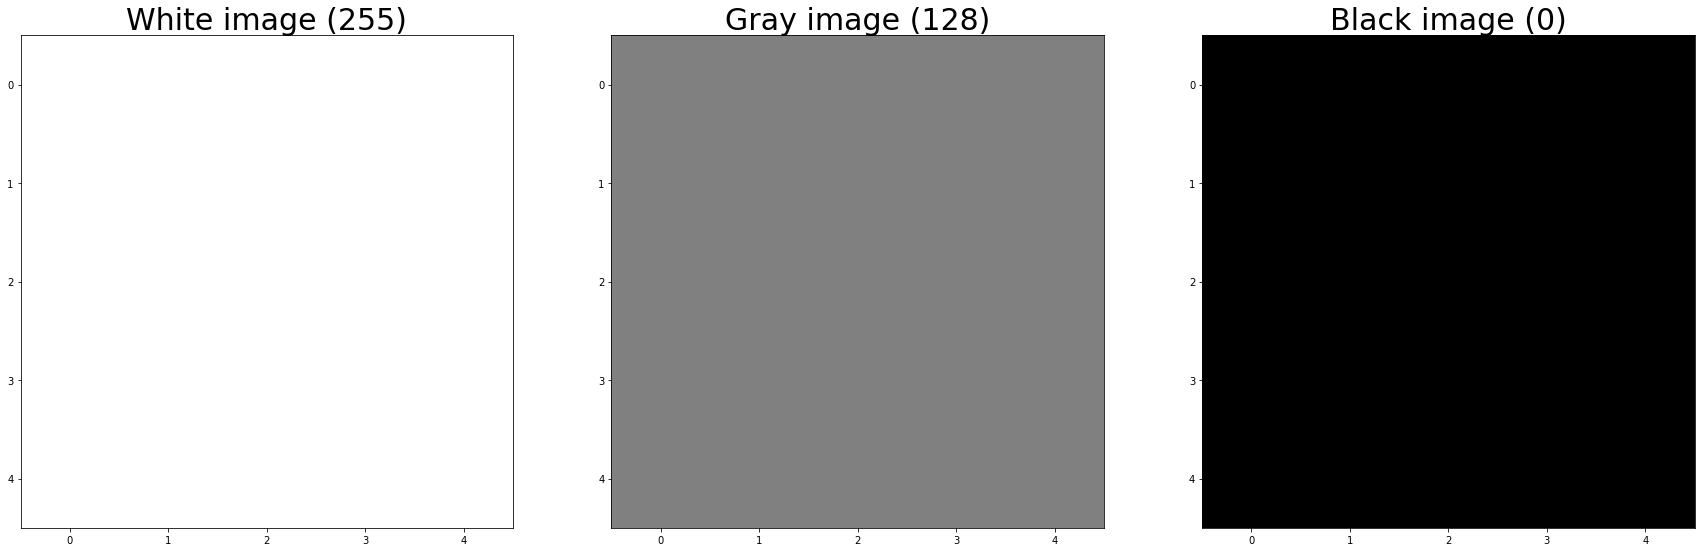

In [4]:
white=255*np.ones([5,5],np.uint8)
gray=128*np.ones([5,5],np.uint8)
black=np.zeros([5,5],np.uint8)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(white, cmap='gray',vmin=0, vmax=255)
ax1.set_title('White image (255)', fontsize=30)
ax2.imshow(gray, cmap='gray',vmin=0, vmax=255)
ax2.set_title('Gray image (128)', fontsize=30)
ax3.imshow(black, cmap='gray',vmin=0, vmax=255)
ax3.set_title('Black image (0)', fontsize=30)
plt.show()


### Convolution on slides

### Smothing(Bluring) Filter (Average Filter or Gaussian filter)

#### built-in filter

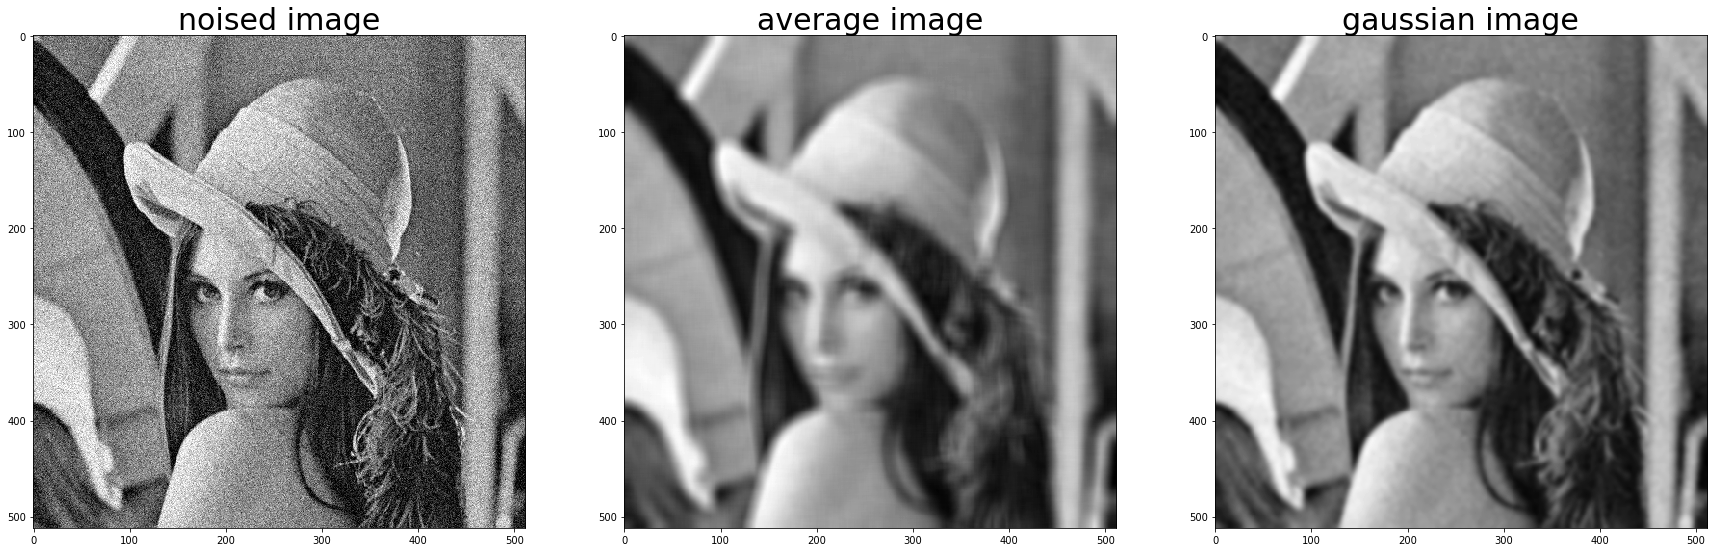

In [5]:
lenna_noise=mpimg.imread('images/lenna_noise.jpg')
average_lenna = cv2.blur(lenna_noise,(15,15))
gaussian_lenna=cv2.GaussianBlur(lenna_noise,(15,15),0)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(lenna_noise, cmap='gray')
ax1.set_title('noised image', fontsize=30)
ax2.imshow(average_lenna, cmap='gray')
ax2.set_title('average image', fontsize=30)
ax3.imshow(gaussian_lenna, cmap='gray')
ax3.set_title('gaussian image', fontsize=30)
plt.show()


#### Hand-made filters

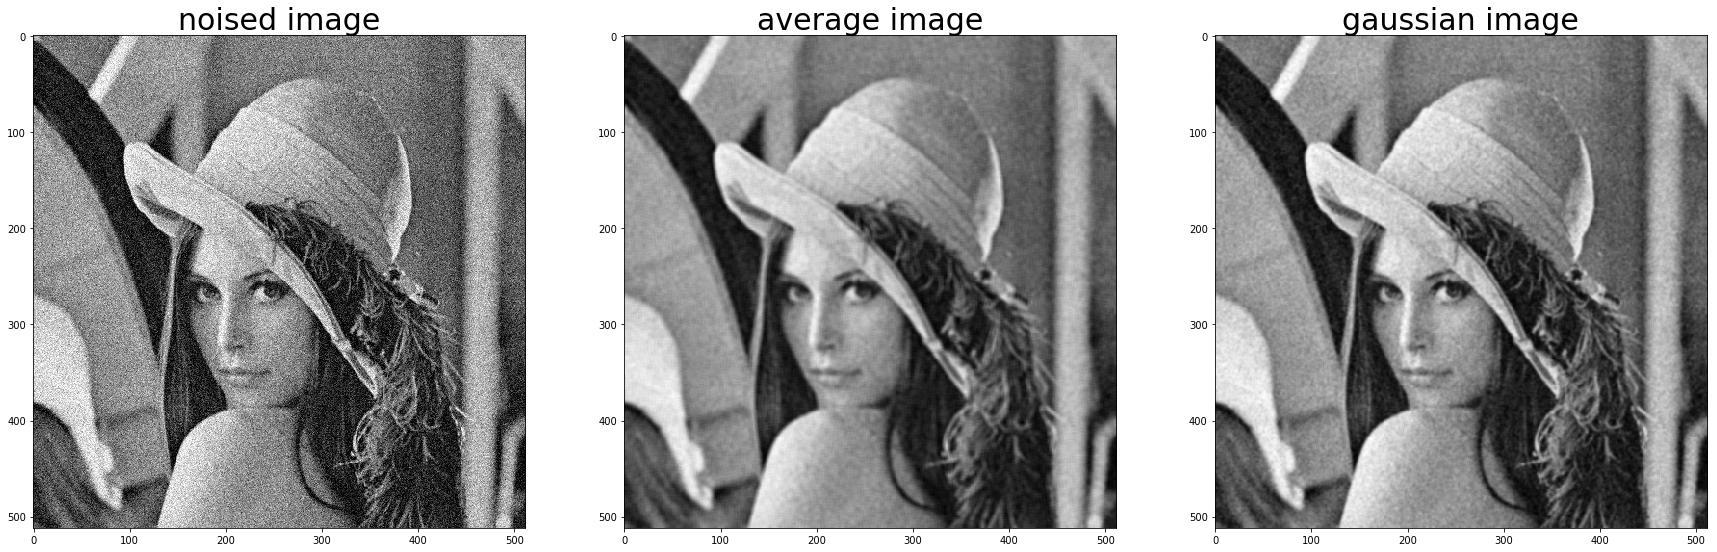

In [6]:
lenna_noise=mpimg.imread('images/lenna_noise.jpg')

average = np.ones((5,5),np.float32)/25
gaussian=np.array([[1,2,4,2,1],
                   [2,4,8,4,2],
                   [4,8,16,8,4],
                   [2,4,8,4,2],
                   [1,2,4,2,1]],np.float32)/100

average_lenna = cv2.filter2D(lenna_noise,-1,average)
gaussian_lenna= cv2.filter2D(lenna_noise,-1,gaussian)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(lenna_noise, cmap='gray')
ax1.set_title('noised image', fontsize=30)
ax2.imshow(average_lenna, cmap='gray')
ax2.set_title('average image', fontsize=30)
ax3.imshow(gaussian_lenna, cmap='gray')
ax3.set_title('gaussian image', fontsize=30)
plt.show()


### Non linear filters (Median,Maximum,Minimum)

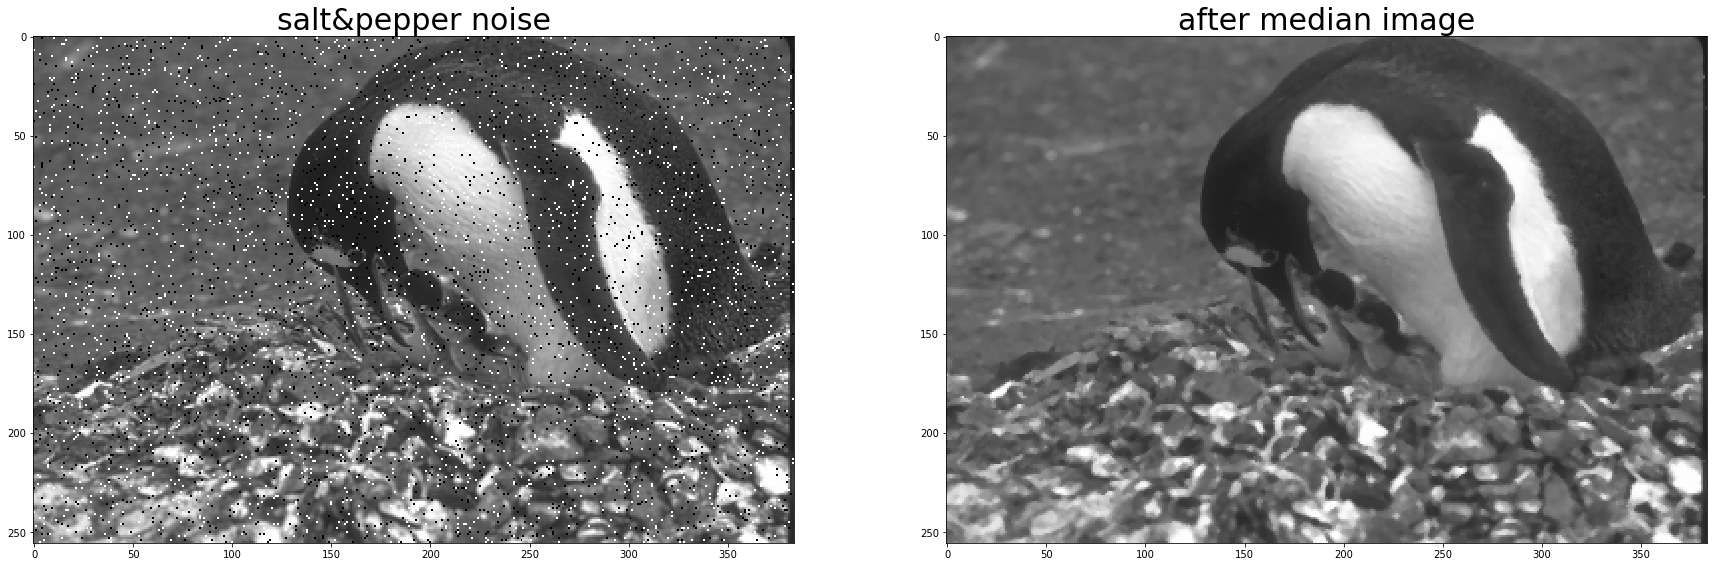

In [7]:
salt_pepper=mpimg.imread('images/salt_pepper.jpg')
medianImg = cv2.medianBlur(salt_pepper,3)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
ax1.imshow(salt_pepper, cmap='gray',vmin=0, vmax=255)
ax1.set_title('salt&pepper noise', fontsize=30)
ax2.imshow(medianImg, cmap='gray',vmin=0, vmax=255)
ax2.set_title('after median image', fontsize=30)
plt.show()


### Laplacian Filter(edge detection)

#### built-in filter

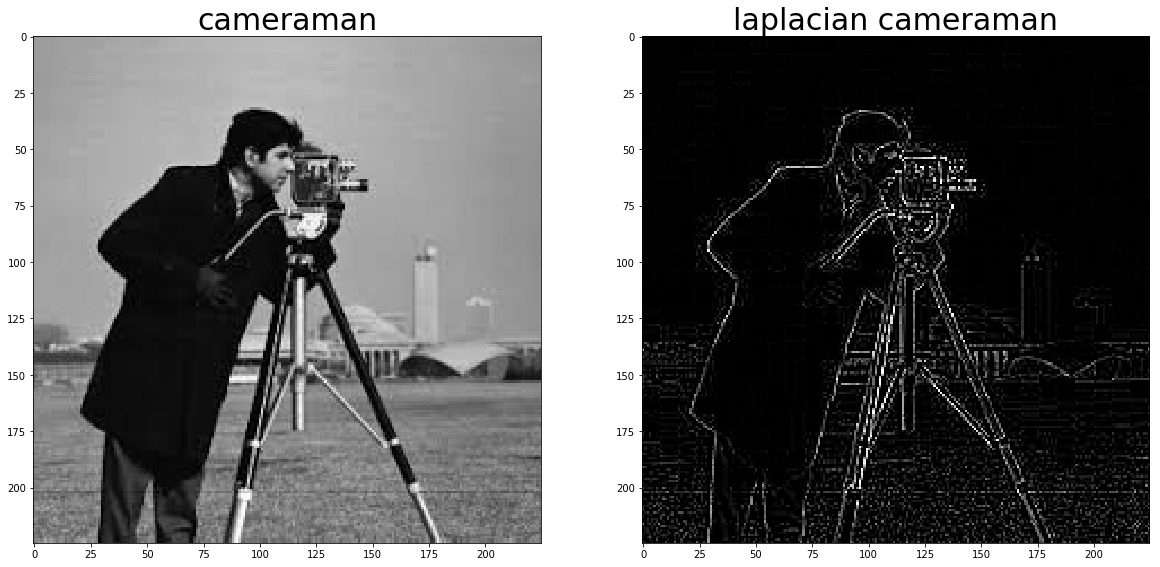

In [8]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

laplacian_builtin = cv2.Laplacian(cameraman,-1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cameraman, cmap='gray')
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(laplacian_builtin, cmap='gray')
ax2.set_title('laplacian cameraman', fontsize=30)
plt.show()


#### Hand-made filters

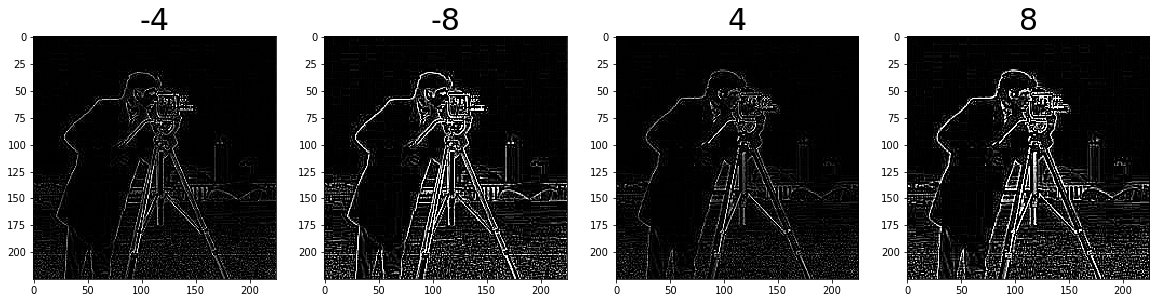

In [9]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

laplacian1=np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])

laplacian2=np.array([[1,1,1],
                   [1,-8,1],
                   [1,1,1]])

laplacian3=np.array([[0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]])

laplacian4=np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])

laplacian_handmade1 = cv2.filter2D(cameraman,-1,laplacian1)
laplacian_handmade2 = cv2.filter2D(cameraman,-1,laplacian2)
laplacian_handmade3 = cv2.filter2D(cameraman,-1,laplacian3)
laplacian_handmade4 = cv2.filter2D(cameraman,-1,laplacian4)

f, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,20))
ax1.imshow(laplacian_handmade1, cmap='gray')
ax1.set_title('-4', fontsize=30)
ax2.imshow(laplacian_handmade2, cmap='gray')
ax2.set_title('-8', fontsize=30)
ax3.imshow(laplacian_handmade3, cmap='gray')
ax3.set_title('4', fontsize=30)
ax4.imshow(laplacian_handmade4, cmap='gray')
ax4.set_title('8', fontsize=30)
plt.show()


### Sharpening Filters(edge detection)

#### hand-made filter

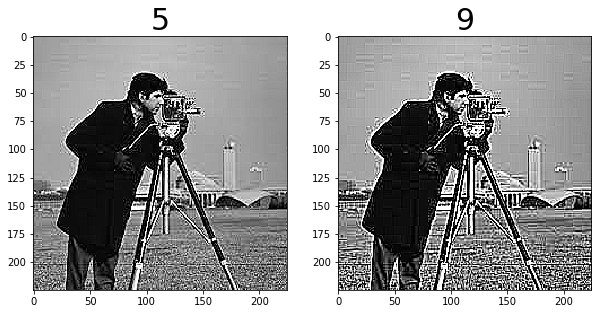

In [10]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

sharpen1=np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

sharpen2=np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])

sharpen_handmade1 = cv2.filter2D(cameraman,-1,sharpen1)
sharpen_handmade2 = cv2.filter2D(cameraman,-1,sharpen2)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,20))
ax1.imshow(sharpen_handmade1, cmap='gray')
ax1.set_title('5', fontsize=30)
ax2.imshow(sharpen_handmade2, cmap='gray')
ax2.set_title('9', fontsize=30)
plt.show()


### Image Enhancement

#### Threshold

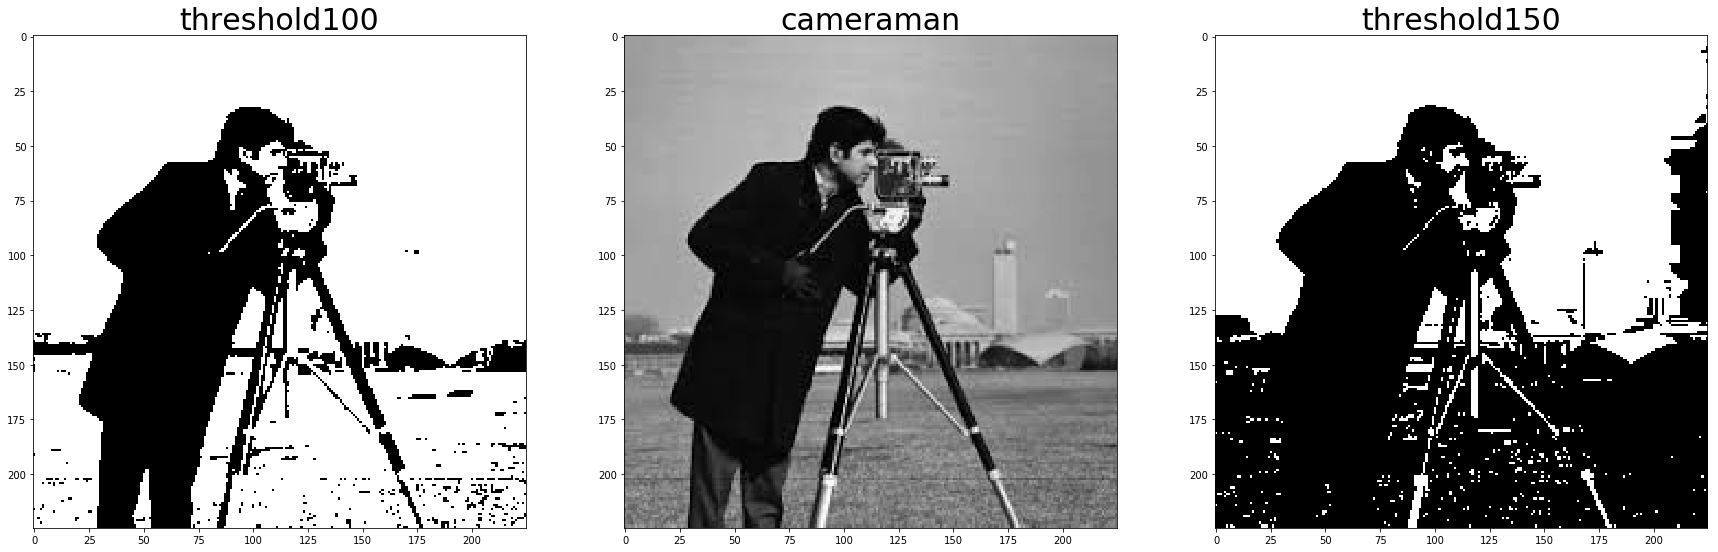

In [11]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

threshold100=np.zeros_like(cameraman)
threshold150=np.zeros_like(cameraman)
threshold100[cameraman>=100]=255
threshold150[cameraman>=150]=255

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(threshold100, cmap='gray')
ax1.set_title('threshold100', fontsize=30)
ax2.imshow(cameraman, cmap='gray')
ax2.set_title('cameraman', fontsize=30)
ax3.imshow(threshold150, cmap='gray')
ax3.set_title('threshold150', fontsize=30)
plt.show()


#### Log

`brigter=log2(1+x)`
`darker=1-log2(2-x)`
`x=[0:1]`

brighter= 175.60349244 original= 156 darker= 134.320711128


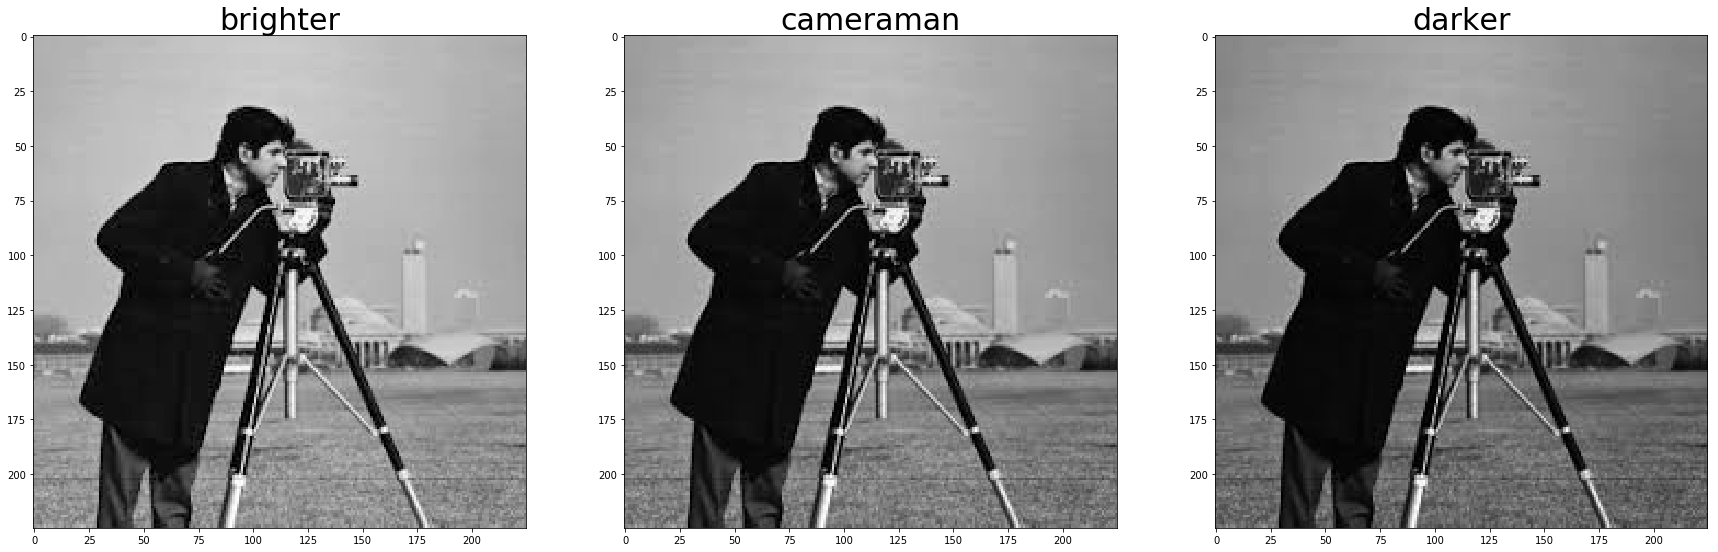

In [12]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

darker=255*(1- np.log2(2-(cameraman/255)))
brighter=255*(np.log2(1+(cameraman/255)))
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(brighter, cmap='gray')
ax1.set_title('brighter', fontsize=30)
ax2.imshow(cameraman, cmap='gray')
ax2.set_title('cameraman', fontsize=30)
ax3.imshow(darker, cmap='gray')
ax3.set_title('darker', fontsize=30)
print('brighter=',brighter[0,0],'original=',cameraman[0,0],'darker=',darker[0,0])
plt.show()


#### Gamma Correction

`brigter=x^gamma, gamma<1`
`darker=x^gamma, gamma>1`
`x=[0:1]`

brighter= 199.449241663 original= 156 darker= 35.7172367189


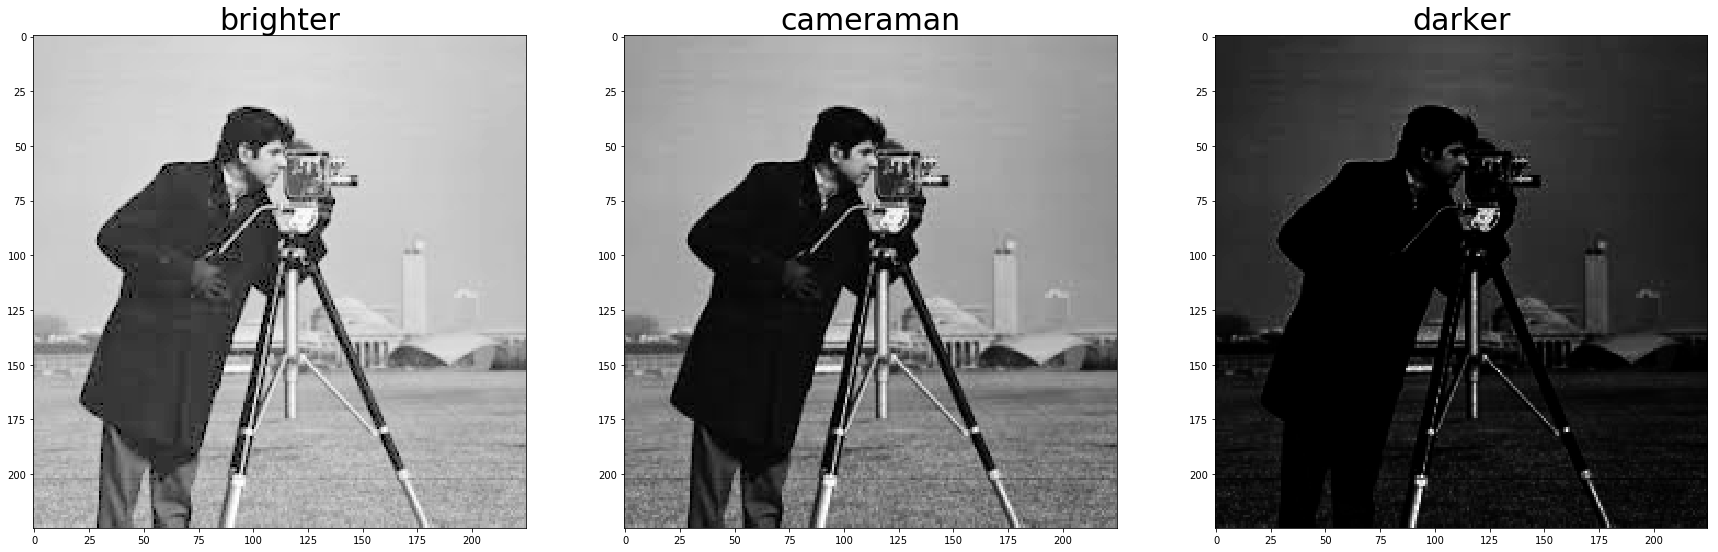

In [13]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

darker=255*( np.power((cameraman/255),4))
brighter=255*( np.power((cameraman/255),0.5))
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(brighter, cmap='gray')
ax1.set_title('brighter', fontsize=30)
ax2.imshow(cameraman, cmap='gray')
ax2.set_title('cameraman', fontsize=30)
ax3.imshow(darker, cmap='gray')
ax3.set_title('darker', fontsize=30)
print('brighter=',brighter[0,0],'original=',cameraman[0,0],'darker=',darker[0,0])
plt.show()


#### Contrast

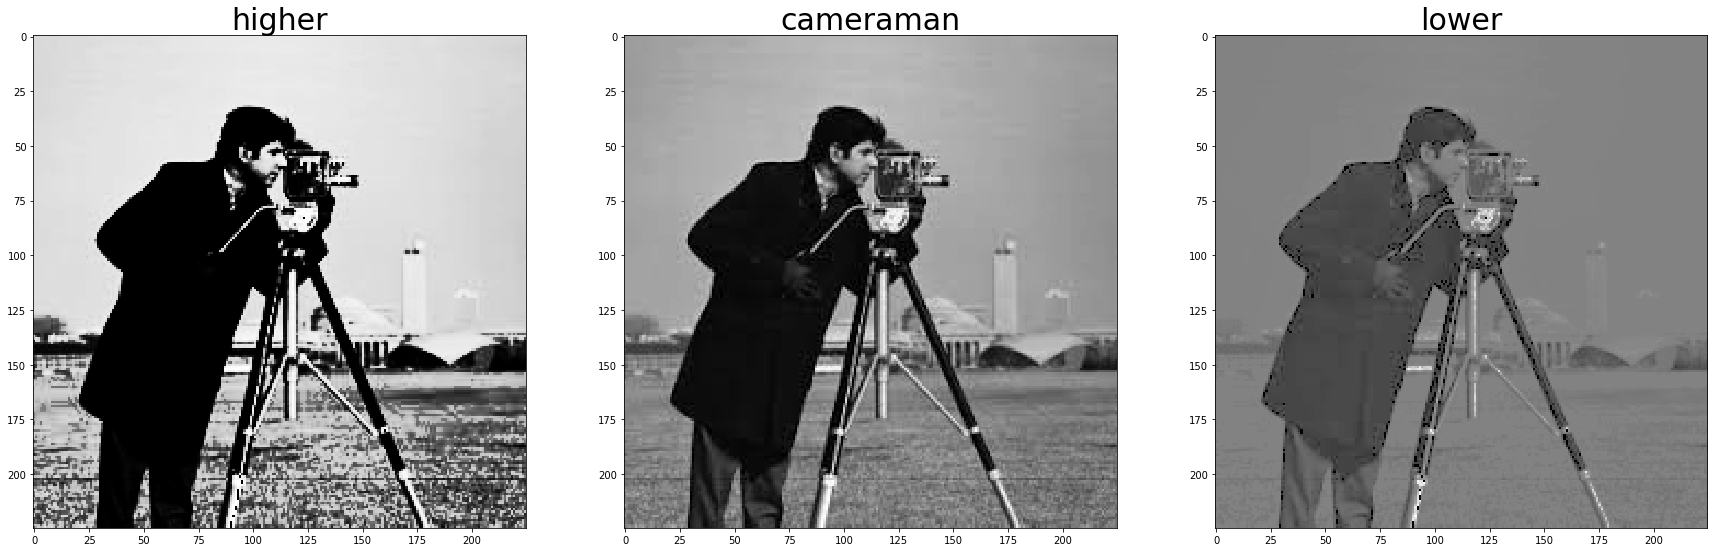

In [14]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

higher=np.zeros_like(cameraman)
lower=np.zeros_like(cameraman)
higher[cameraman<=127]=255*( np.power(2*(cameraman[cameraman<=127]/255),4))/2
higher[cameraman>=127]=255*((( np.power(2*((cameraman[cameraman>=127]-127)/255),0.25))/2)+127)
lower[cameraman<=127]=255*( np.power(2*(cameraman[cameraman<=127]/255),0.25))/2
lower[cameraman>=127]=255*((( np.power(2*((cameraman[cameraman>=127]-127)/255),4))/2)+127)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(higher, cmap='gray')
ax1.set_title('higher', fontsize=30)
ax2.imshow(cameraman, cmap='gray')
ax2.set_title('cameraman', fontsize=30)
ax3.imshow(lower, cmap='gray')
ax3.set_title('lower', fontsize=30)
plt.show()


## Lecture 3 **(Frequency Domain)**

convert to frequency domain

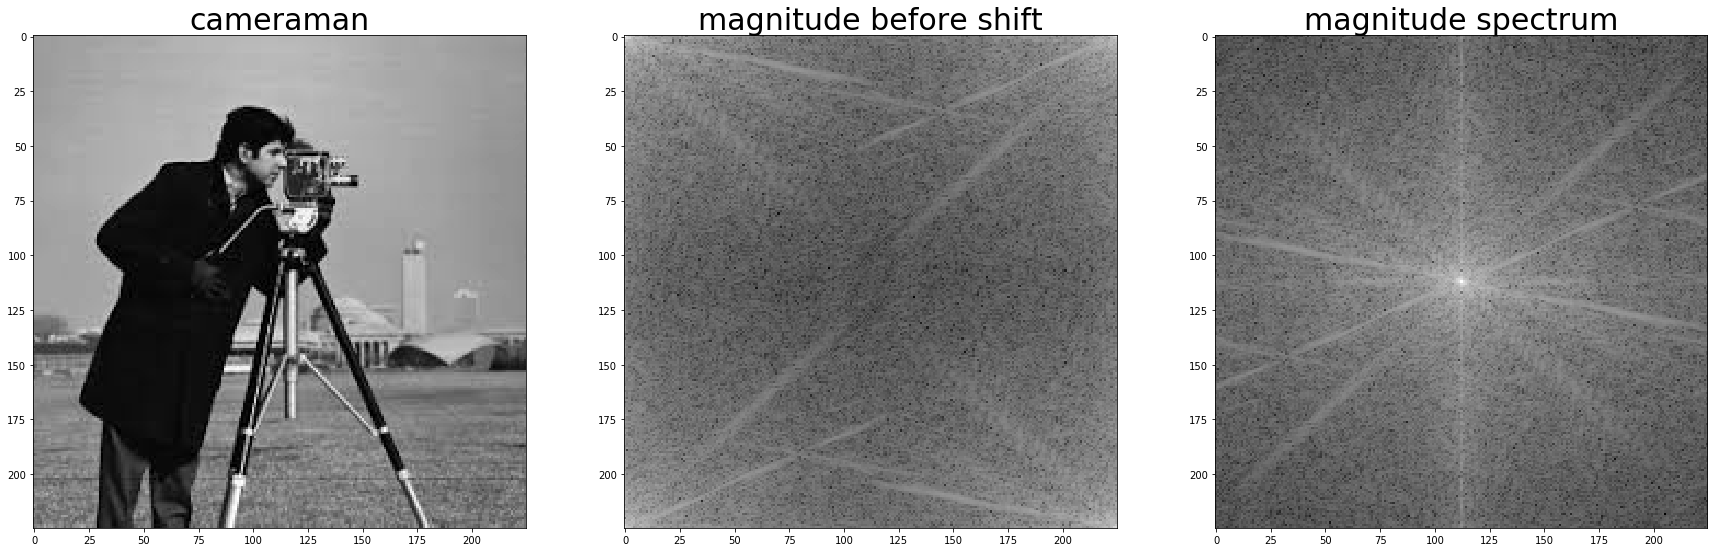

In [15]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
magnitude_before_shift=20*np.log(np.abs(f))
magnitude_spectrum = 20*np.log(np.abs(fshift))

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(cameraman, cmap='gray')
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(magnitude_before_shift, cmap='gray')
ax2.set_title('magnitude before shift', fontsize=30)
ax3.imshow(magnitude_spectrum, cmap='gray')
ax3.set_title('magnitude spectrum', fontsize=30)
plt.show()

### Notch filter

original_image max: 255
notched_image max: 136.181392593
original_image mean: 118.818607407
maxs difference: 118.818607407


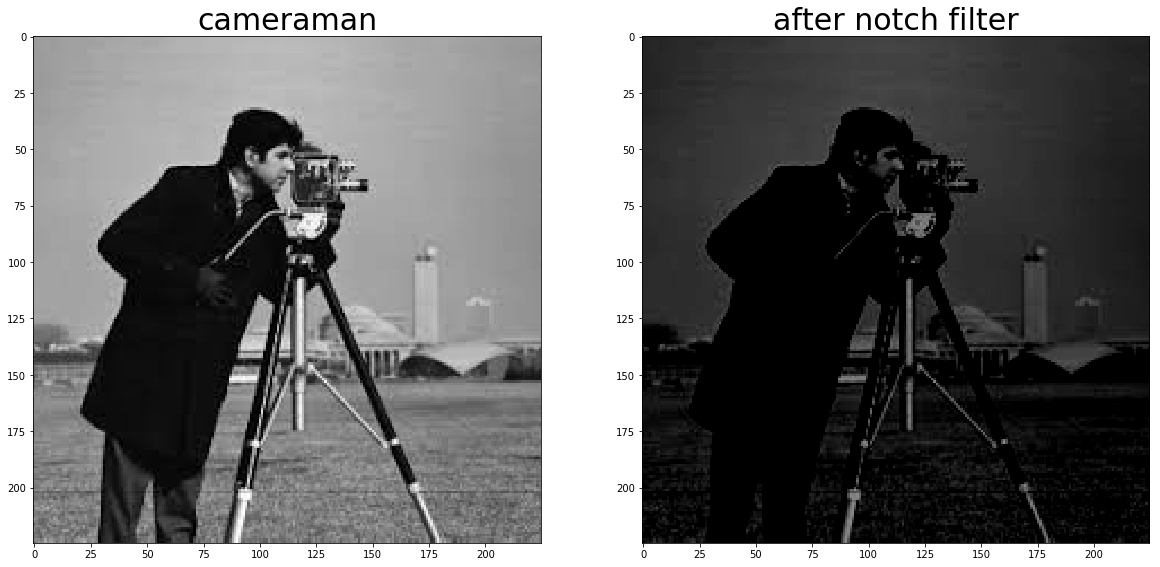

In [16]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
fshift[cameraman.shape[0]//2,cameraman.shape[1]//2]=0
ifshift=np.fft.ifftshift(fshift)
iff=np.fft.ifft2(ifshift)
iff=np.real(iff)

print("original_image max:",np.max(cameraman))
print("notched_image max:",np.max(iff))
print("original_image mean:",np.mean(cameraman))
print("maxs difference:",np.max(cameraman)-np.max(iff))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cameraman, cmap='gray',vmin=0, vmax=255)
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(iff, cmap='gray',vmin=0, vmax=255)
ax2.set_title('after notch filter', fontsize=30)
plt.show()

### Ideal Low Pass Filter

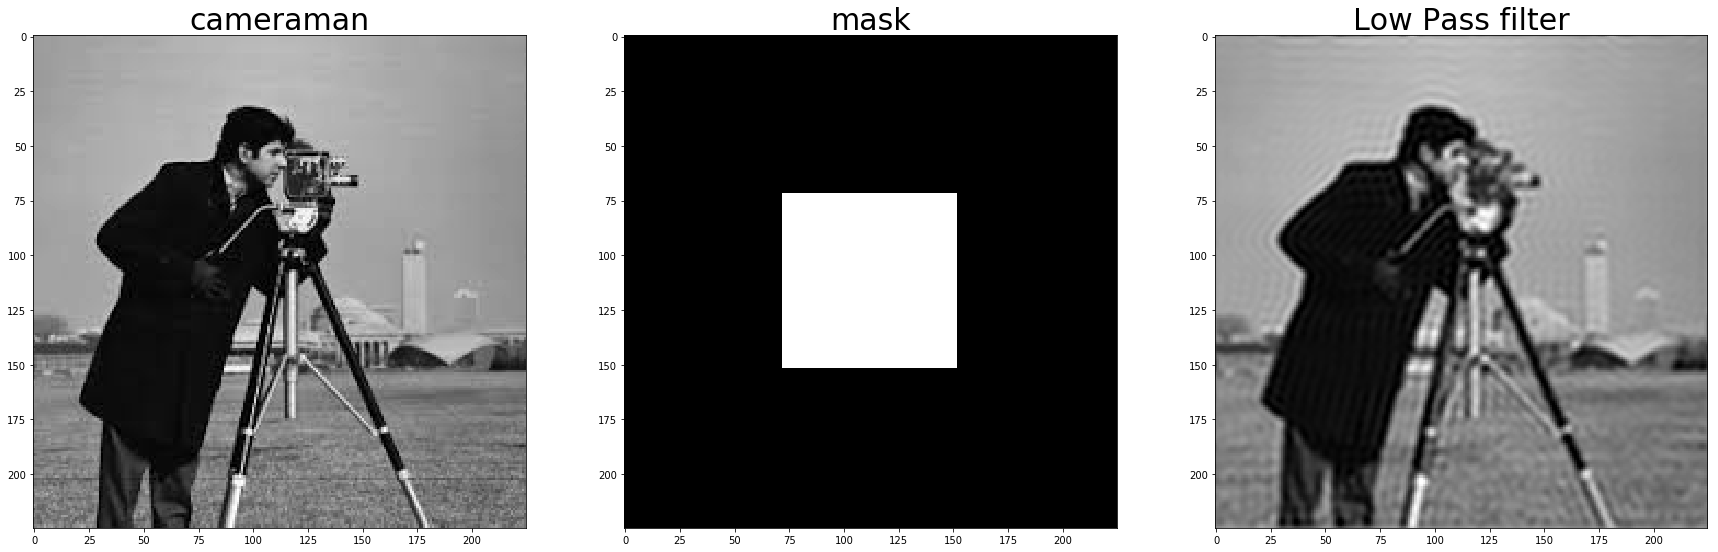

In [17]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

rows, cols = cameraman.shape
crow,ccol = rows//2 , cols//2
mask = np.zeros((rows,cols),np.uint8)
mask[crow-40:crow+40, ccol-40:ccol+40] = 1

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
fshift=fshift*mask
ifshift=np.fft.ifftshift(fshift)
iff=np.fft.ifft2(ifshift)
iff=np.real(iff)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(cameraman, cmap='gray',vmin=0, vmax=255)
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(mask, cmap='gray',vmin=0, vmax=1)
ax2.set_title('mask', fontsize=30)
ax3.imshow(iff, cmap='gray',vmin=0, vmax=255)
ax3.set_title('Low Pass filter', fontsize=30)
plt.show()

### Gaussian/Butterworth Low Pass Filter

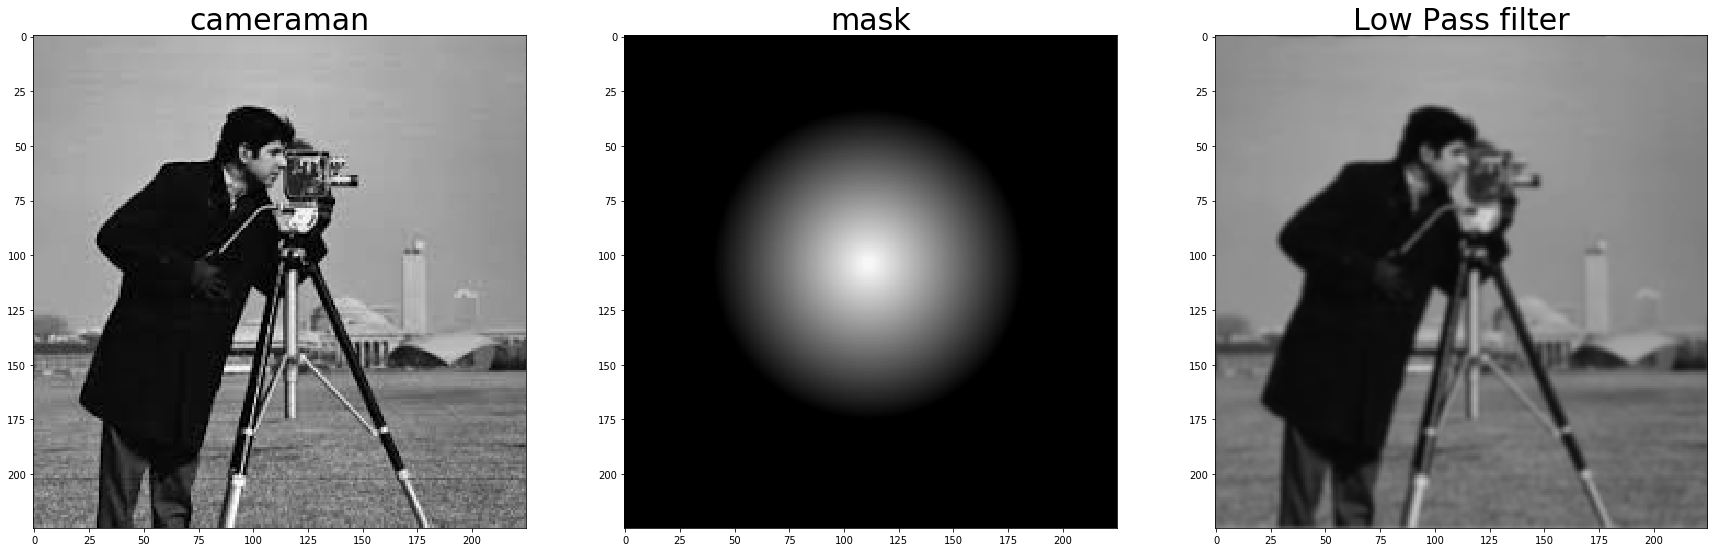

In [18]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

mask=mpimg.imread('images/low_pass_mask.jpg')
mask=cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
mask=mask/255

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
fshift=fshift*mask
ifshift=np.fft.ifftshift(fshift)
iff=np.fft.ifft2(ifshift)
iff=np.real(iff)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(cameraman, cmap='gray',vmin=0, vmax=255)
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(mask, cmap='gray',vmin=0, vmax=1)
ax2.set_title('mask', fontsize=30)
ax3.imshow(iff, cmap='gray',vmin=0, vmax=255)
ax3.set_title('Low Pass filter', fontsize=30)
plt.show()

### High Pass Filter

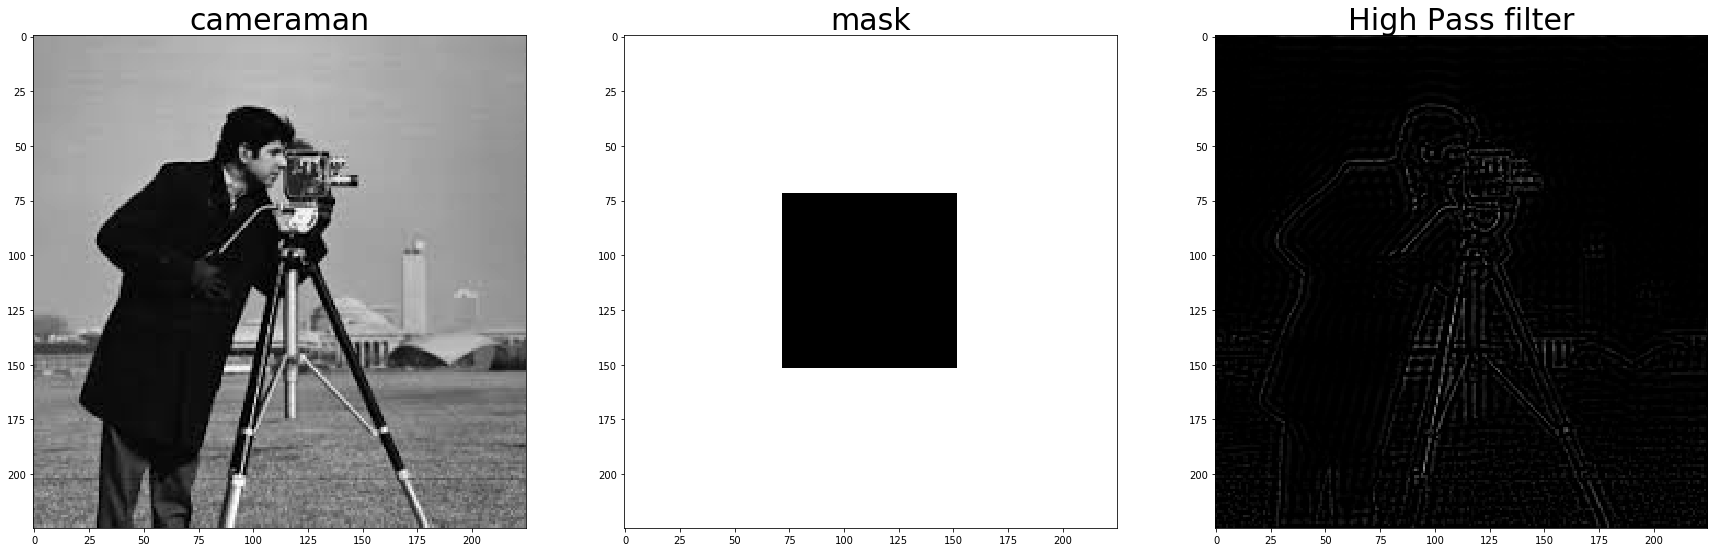

In [19]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

rows, cols = cameraman.shape
crow,ccol = rows//2 , cols//2
mask = np.ones((rows,cols),np.uint8)
mask[crow-40:crow+40, ccol-40:ccol+40] = 0

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
fshift=fshift*mask
ifshift=np.fft.ifftshift(fshift)
iff=np.fft.ifft2(ifshift)
iff=np.real(iff)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(cameraman, cmap='gray',vmin=0, vmax=255)
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(mask, cmap='gray',vmin=0, vmax=1)
ax2.set_title('mask', fontsize=30)
ax3.imshow(iff, cmap='gray',vmin=0, vmax=255)
ax3.set_title('High Pass filter', fontsize=30)
plt.show()

### Gaussian/Butterworth High Pass Filter

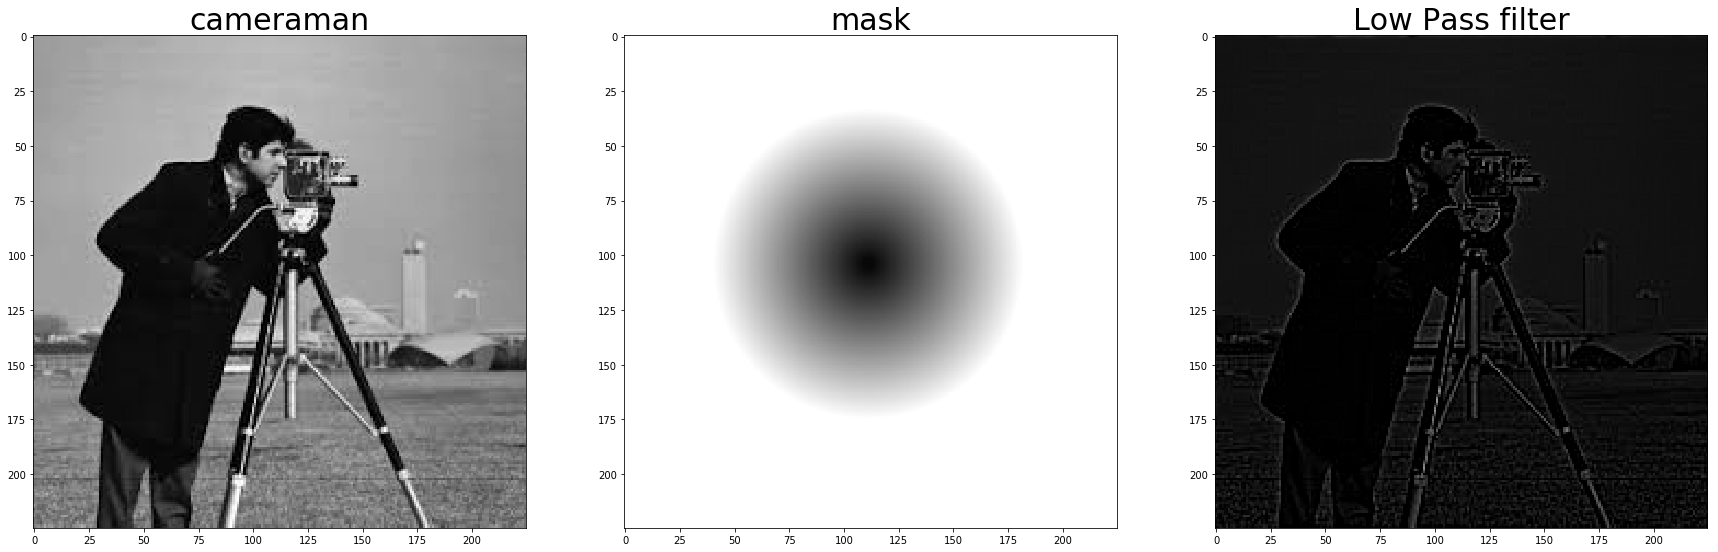

In [20]:
cameraman=mpimg.imread('images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

mask=mpimg.imread('images/high_pass_mask.jpg')
mask=cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
mask=mask/255

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
fshift=fshift*mask
ifshift=np.fft.ifftshift(fshift)
iff=np.fft.ifft2(ifshift)
iff=np.real(iff)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(cameraman, cmap='gray',vmin=0, vmax=255)
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(mask, cmap='gray',vmin=0, vmax=1)
ax2.set_title('mask', fontsize=30)
ax3.imshow(iff, cmap='gray',vmin=0, vmax=255)
ax3.set_title('Low Pass filter', fontsize=30)
plt.show()

## Lecture 3 **(Morphological Operations)**


### kernels

### Dilation

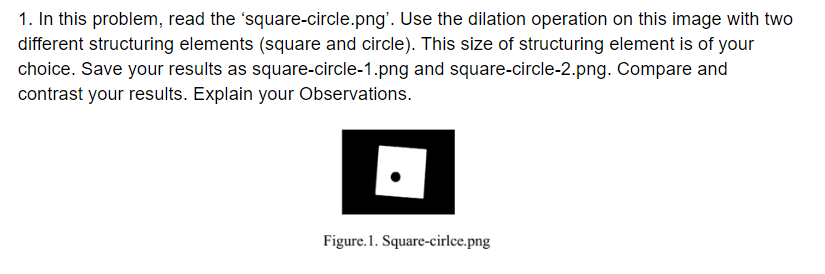

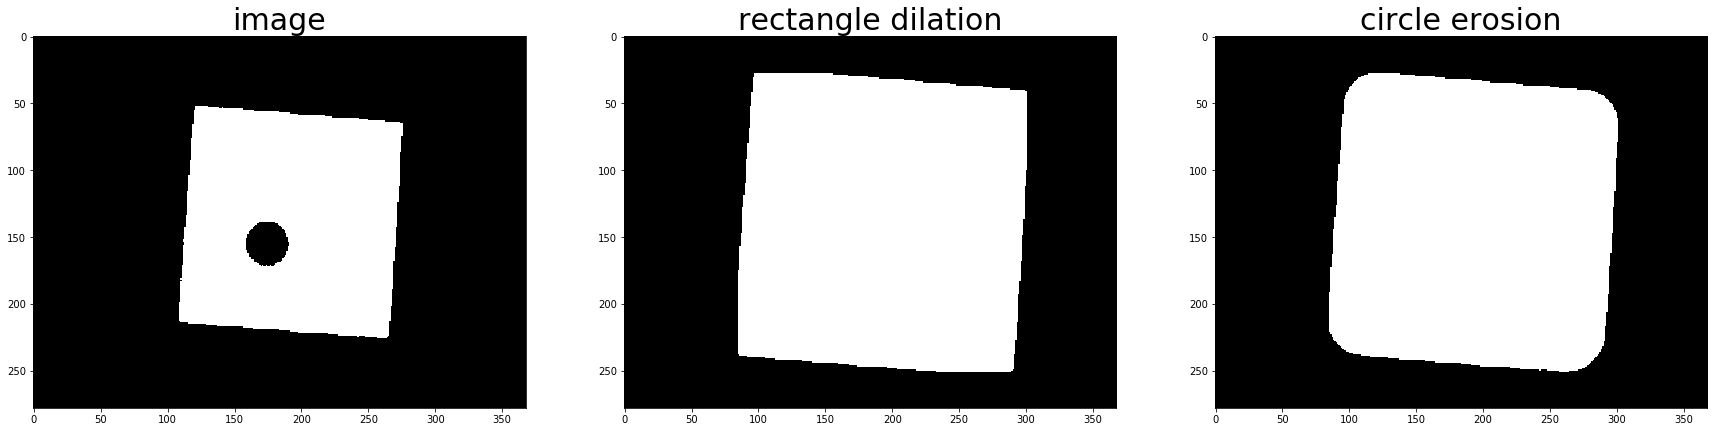

In [21]:
image=mpimg.imread('images/morph/Square-circle.png')
image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret,image=cv2.threshold(image,0.5,1,cv2.THRESH_BINARY)

rec_kernel= cv2.getStructuringElement(cv2.MORPH_RECT,(50,50))
dilation1 = cv2.dilate(image,rec_kernel,iterations = 1)
cir_kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
dilation2 = cv2.dilate(image,cir_kernel,iterations = 1)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(image, cmap='gray',vmin=0, vmax=1)
ax1.set_title('image', fontsize=30)
ax2.imshow(dilation1, cmap='gray',vmin=0, vmax=1)
ax2.set_title('rectangle dilation', fontsize=30)
ax3.imshow(dilation2, cmap='gray',vmin=0, vmax=1)
ax3.set_title('circle erosion', fontsize=30)
plt.show()

-----------------------------
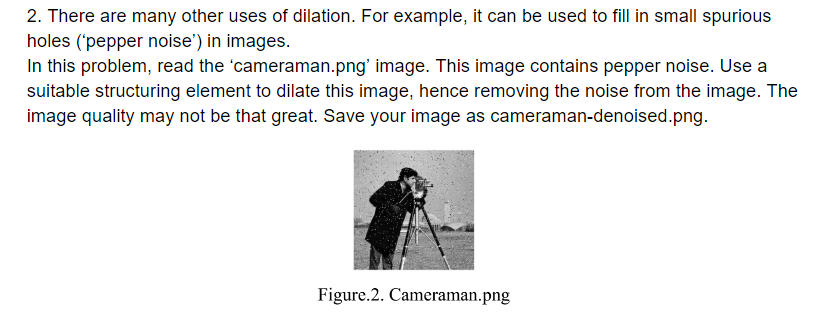

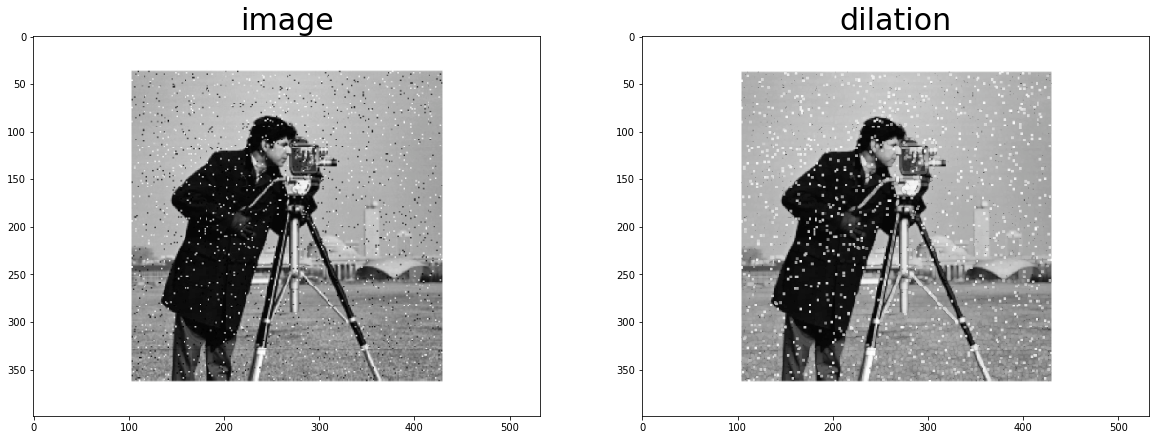

In [22]:
image=mpimg.imread('images/morph/Cameraman.png')

kernel=np.ones((2,2))
dilation1 = cv2.dilate(image,kernel,iterations = 1)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image, cmap='gray',vmin=0, vmax=255)
ax1.set_title('image', fontsize=30)
ax2.imshow(dilation1, cmap='gray',vmin=0, vmax=255)
ax2.set_title('dilation', fontsize=30)
plt.show()

---
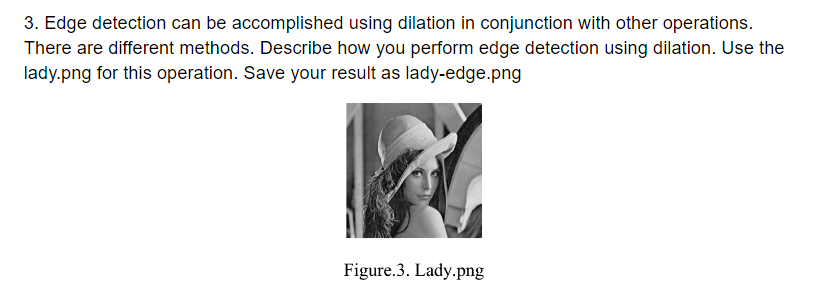

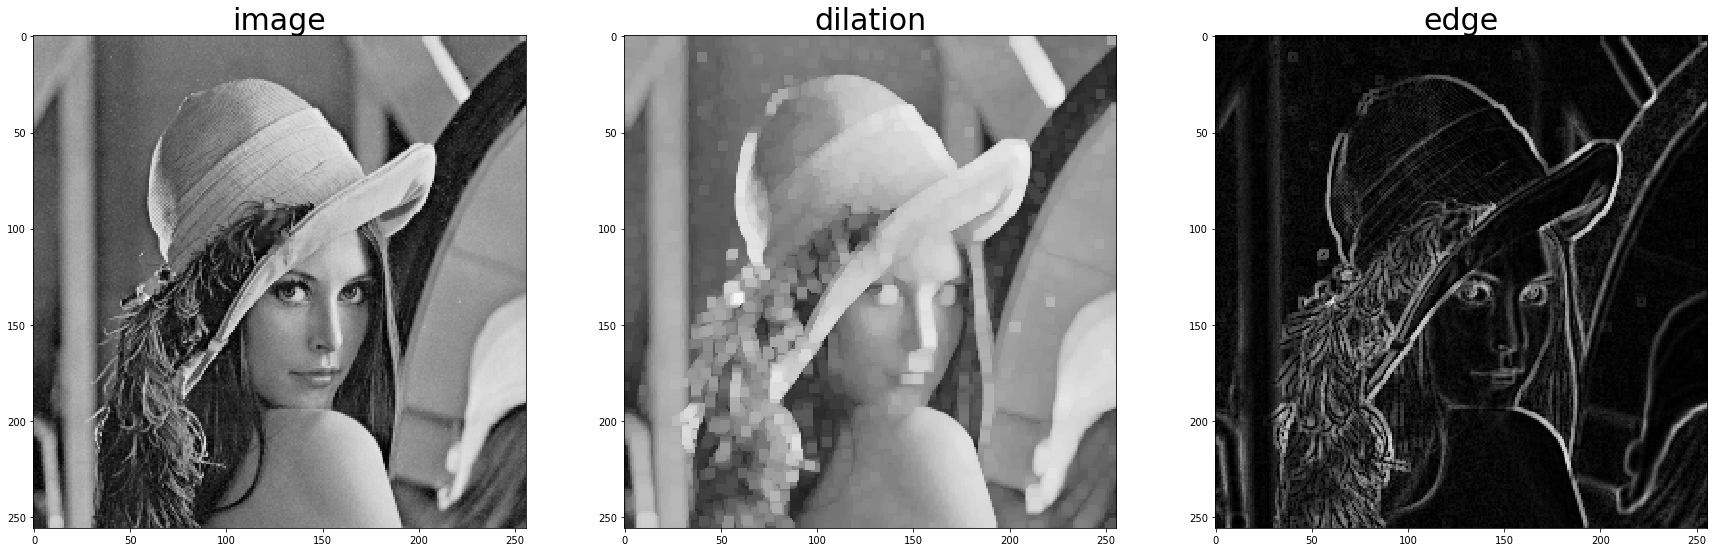

In [23]:
image=mpimg.imread('images/morph/lady.png')

kernel=np.ones((5,5))
erosion1 = cv2.dilate(image,kernel,iterations = 1)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(image, cmap='gray',vmin=0, vmax=255)
ax1.set_title('image', fontsize=30)
ax2.imshow(erosion1, cmap='gray')
ax2.set_title('dilation', fontsize=30)
ax3.imshow(erosion1-image, cmap='gray')
ax3.set_title('edge', fontsize=30)
plt.show()

### Erosion

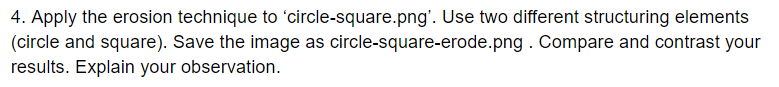

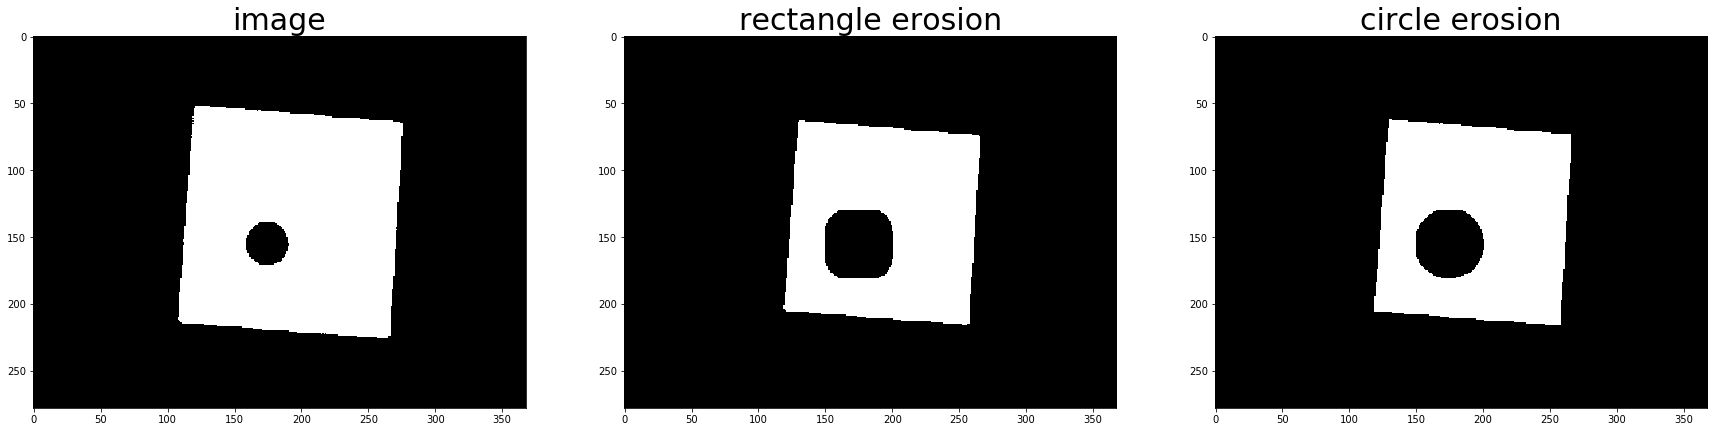

In [24]:
image=mpimg.imread('images/morph/Square-circle.png')
image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret,image=cv2.threshold(image,0.3,1,cv2.THRESH_BINARY)

rec_kernel= cv2.getStructuringElement(cv2.MORPH_RECT,(20,20))
erosion1 = cv2.erode(image,rec_kernel,iterations = 1)
cir_kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
erosion2 = cv2.erode(image,cir_kernel,iterations = 1)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(image, cmap='gray',vmin=0, vmax=1)
ax1.set_title('image', fontsize=30)
ax2.imshow(erosion1, cmap='gray',vmin=0, vmax=1)
ax2.set_title('rectangle erosion', fontsize=30)
ax3.imshow(erosion2, cmap='gray',vmin=0, vmax=1)
ax3.set_title('circle erosion', fontsize=30)
plt.show()

---
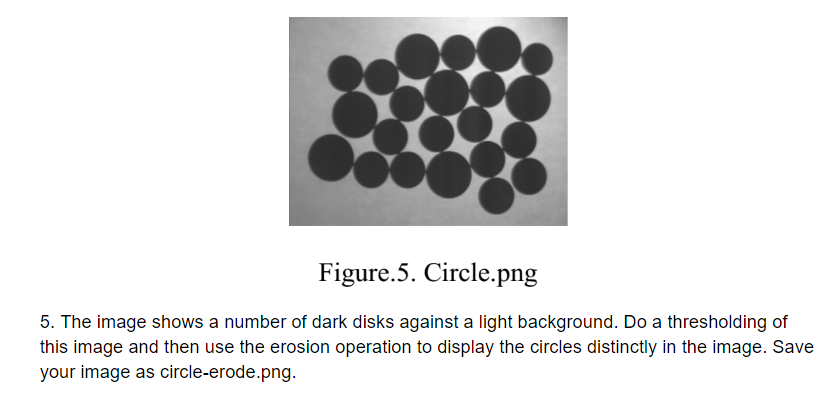

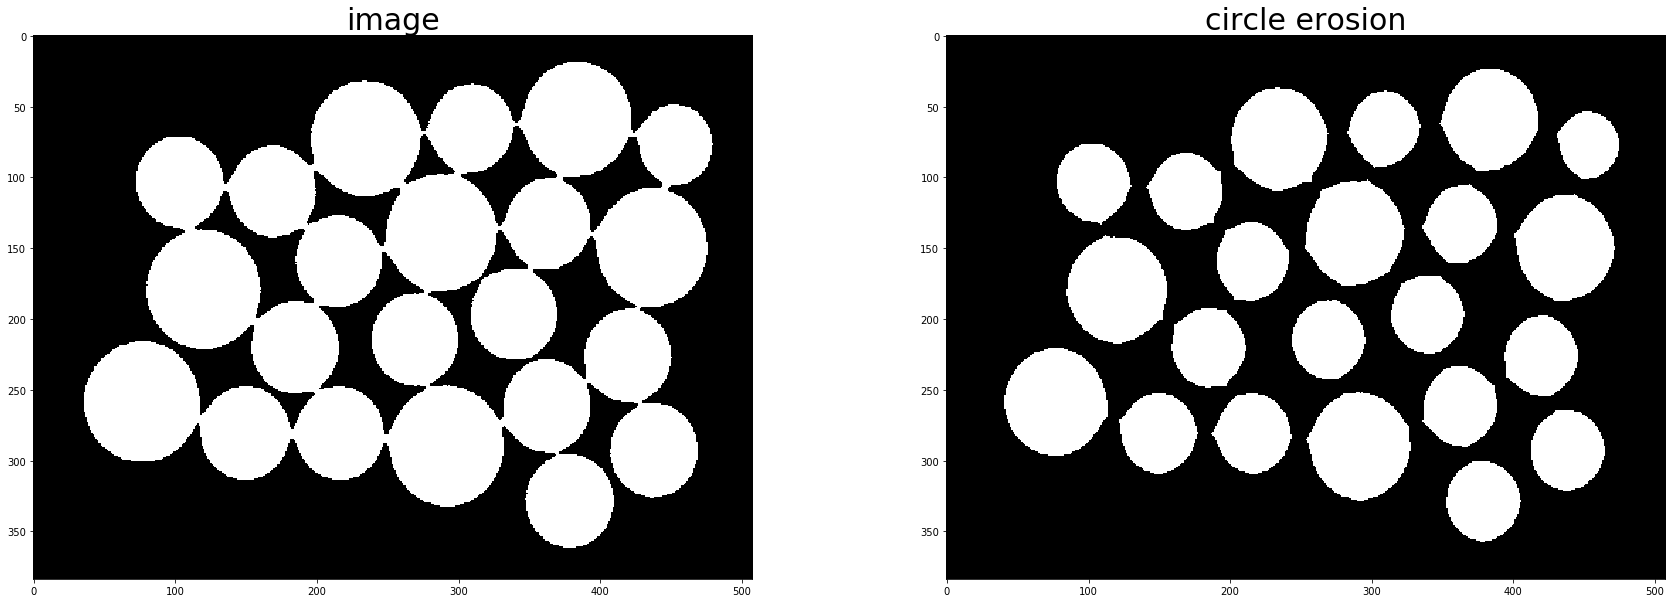

In [25]:
image=mpimg.imread('images/morph/Circle.png')
image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret,image=cv2.threshold(image,0.3,1,cv2.THRESH_BINARY)
image=np.ones_like(image)-image

cir_kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
erosion2 = cv2.erode(image,cir_kernel,iterations = 1)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
ax1.imshow(image, cmap='gray',vmin=0, vmax=1)
ax1.set_title('image', fontsize=30)
ax2.imshow(erosion2, cmap='gray',vmin=0, vmax=1)
ax2.set_title('circle erosion', fontsize=30)
plt.show()

---
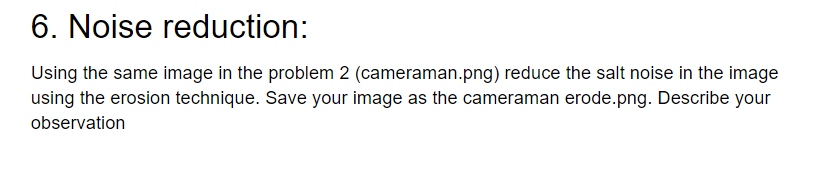

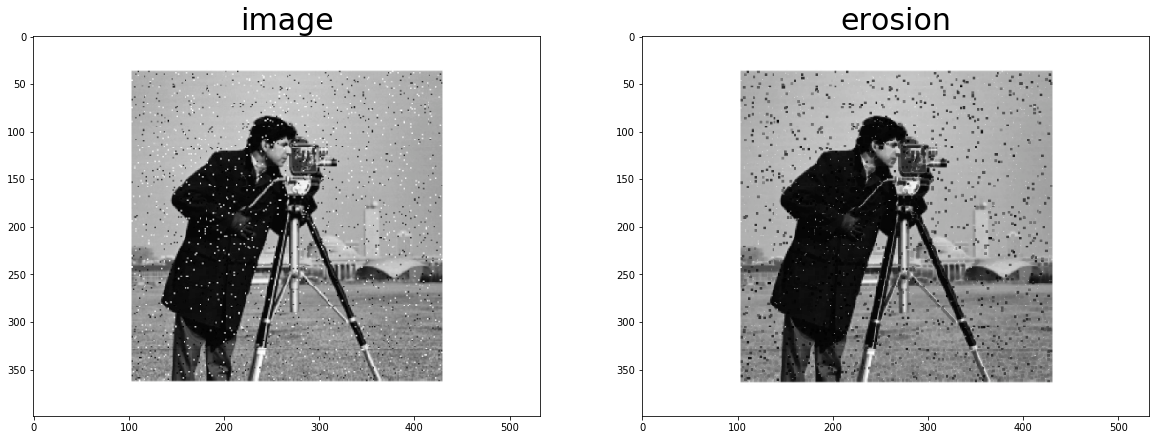

In [26]:
image=mpimg.imread('images/morph/Cameraman.png')

kernel=np.ones((2,2))
erosion1 = cv2.erode(image,kernel,iterations = 1)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image, cmap='gray',vmin=0, vmax=255)
ax1.set_title('image', fontsize=30)
ax2.imshow(erosion1, cmap='gray',vmin=0, vmax=255)
ax2.set_title('erosion', fontsize=30)
plt.show()

### Opening And Closing

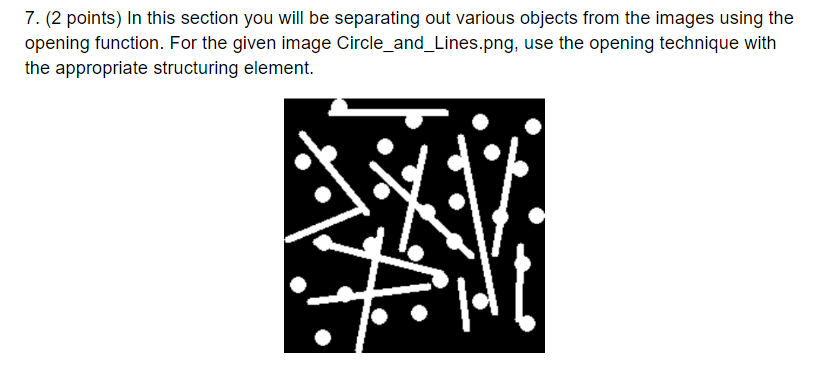

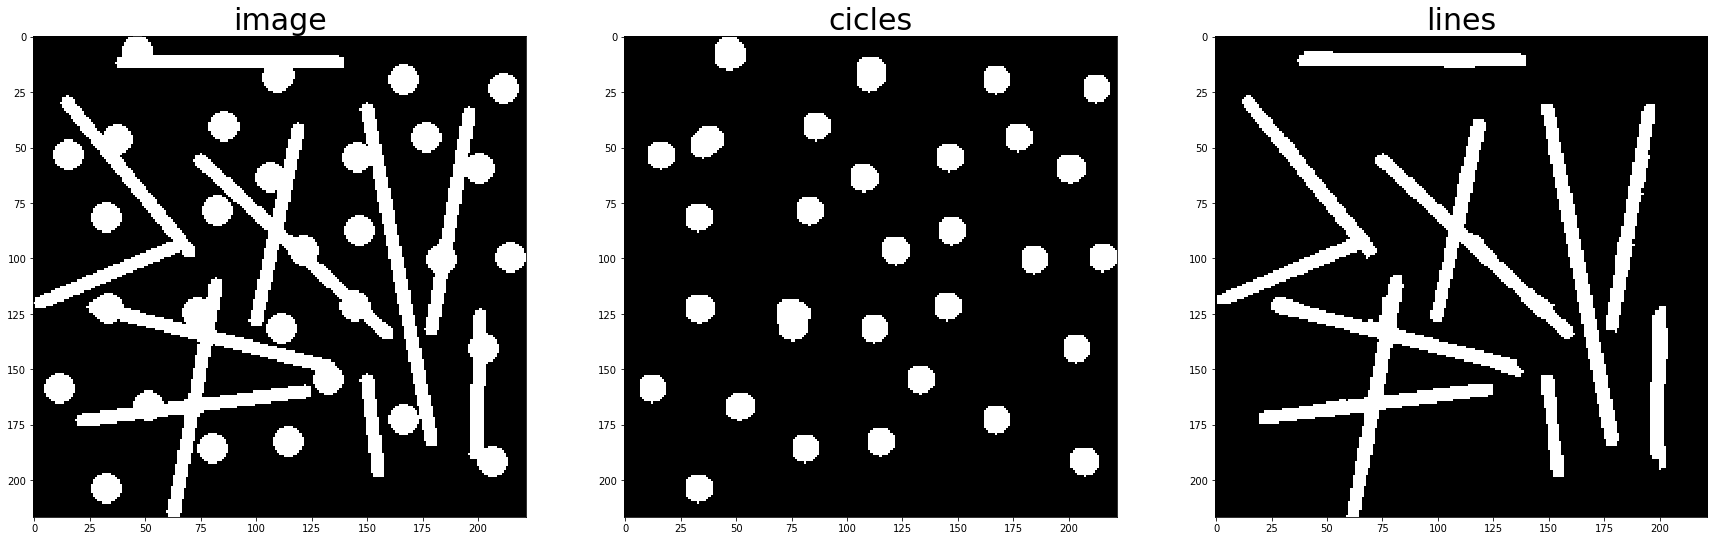

In [27]:
image=mpimg.imread('images/morph/Circle_and_Lines.png')
image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret,image=cv2.threshold(image,0.3,1,cv2.THRESH_BINARY)

cir_kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12))
circles = cv2.morphologyEx(image, cv2.MORPH_OPEN, cir_kernel)

rec_width=41
rectangles=np.zeros_like(image)
rec_kernel=np.zeros((rec_width,rec_width))
rows,cols = rec_kernel.shape
rec_kernel[:,rec_width//2-1:(rec_width//2)+3]=np.ones((rec_width,4))
for i in range(0,180,5):
    rot = cv2.getRotationMatrix2D((cols/2,rows/2),i,1)
    rotated_kernel = cv2.warpAffine(rec_kernel,rot,(cols,rows))
    rotated_kernel=np.array(rotated_kernel,dtype=np.uint8)
    rectangles = ((rectangles==1) | (cv2.morphologyEx(image, cv2.MORPH_OPEN, rotated_kernel)==1))
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(image, cmap='gray',vmin=0, vmax=1)
ax1.set_title('image', fontsize=30)
ax2.imshow(circles, cmap='gray',vmin=0, vmax=1)
ax2.set_title('cicles', fontsize=30)
ax3.imshow(rectangles, cmap='gray',vmin=0, vmax=1)
ax3.set_title('lines', fontsize=30)
plt.show() 

## Lecture 5 **(Image Segmentation)**

### point segmentation

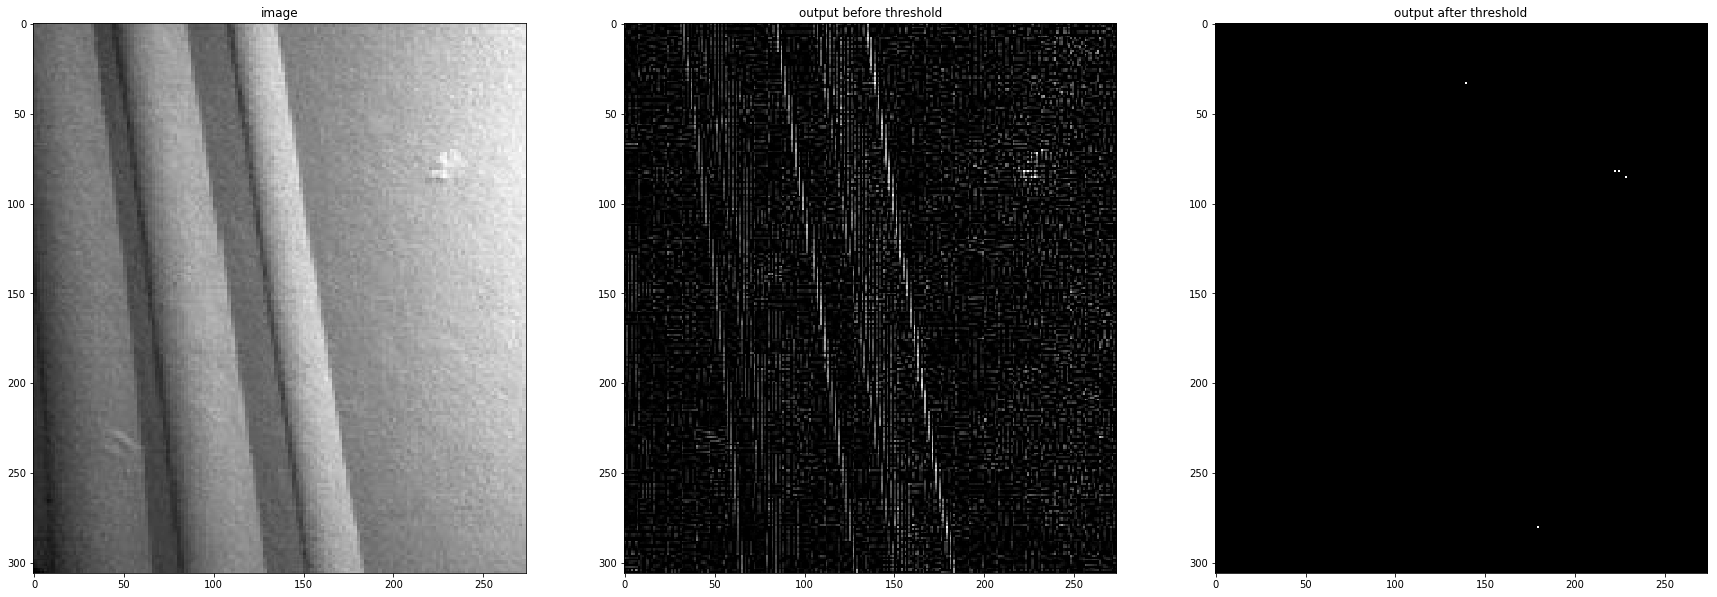

In [28]:
image=mpimg.imread('images/point.JPG')
image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

point_kernel=np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])

output1 = cv2.filter2D(image,-1,point_kernel)
output2=np.zeros_like(image)
output2[output1>=250]=255

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,90))
ax1.imshow(image, cmap='gray')
ax1.set_title('image')
ax2.imshow(output1, cmap='gray',vmin=0, vmax=255)
ax2.set_title('output before threshold')
ax3.imshow(output2, cmap='gray',vmin=0, vmax=255)
ax3.set_title('output after threshold')
plt.show()


### line segmentation

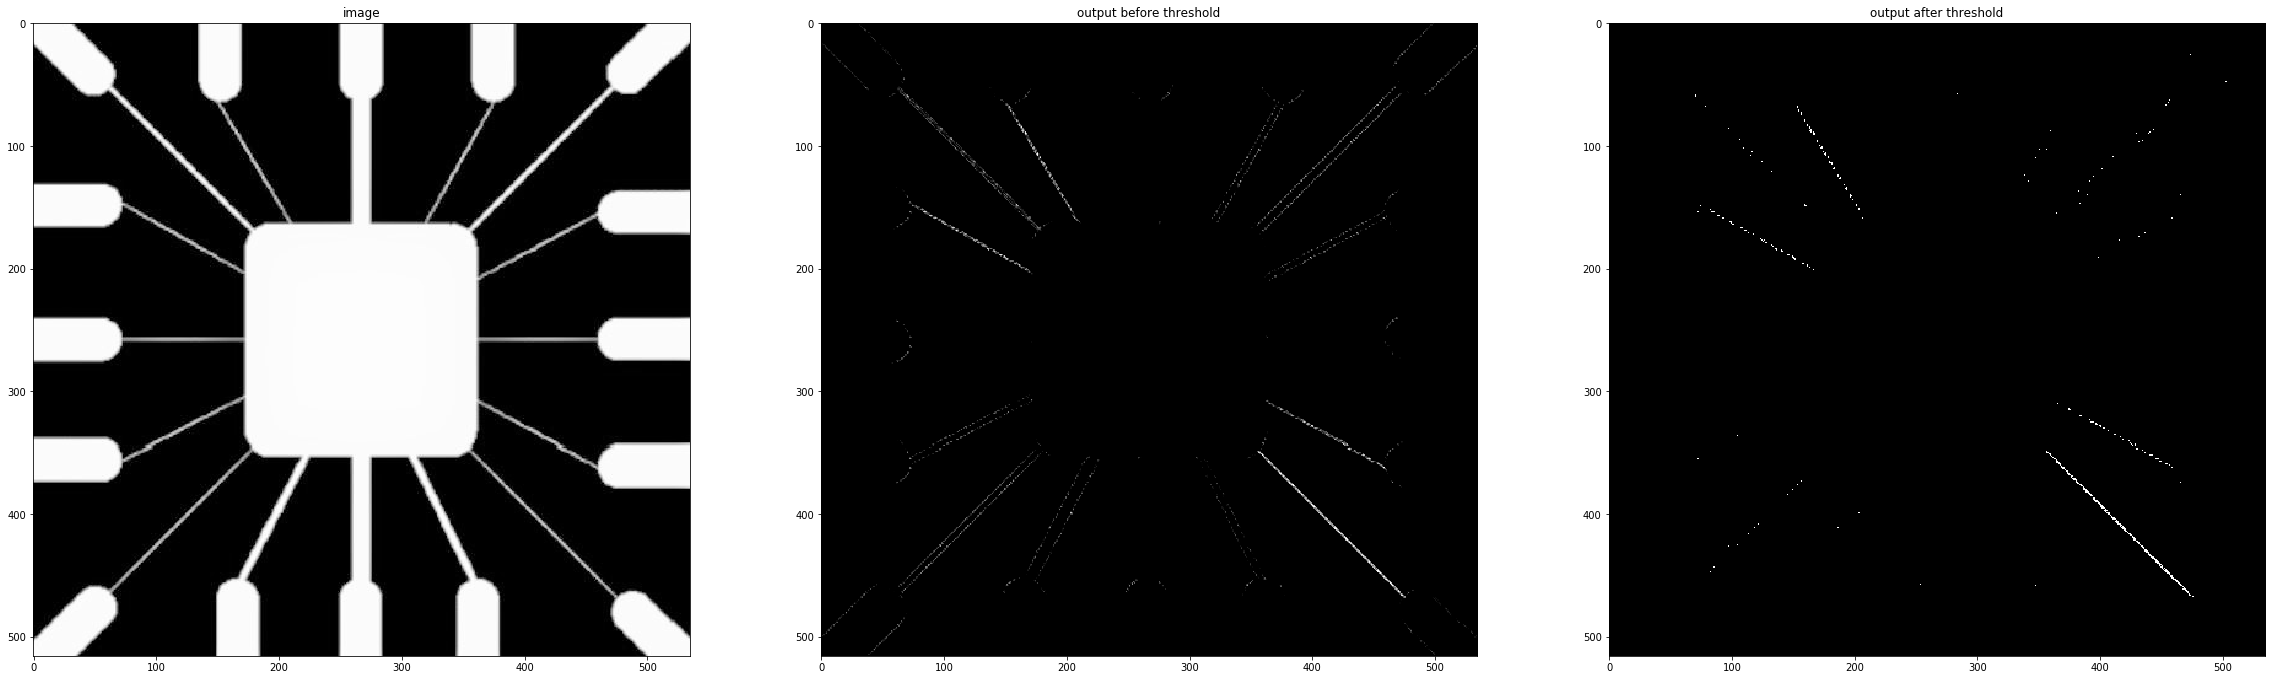

In [29]:
image=mpimg.imread('images/line.JPG')
image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

line_kernel=np.array([[2,-1,-1],
                      [-1,2,-1],
                      [-1,-1,2]])

output1 = cv2.filter2D(image,-1,line_kernel,delta = -100)
output2=np.zeros_like(image)
output2[output1>=130]=255

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(40,120))
ax1.imshow(image, cmap='gray')
ax1.set_title('image')
ax2.imshow(output1, cmap='gray',vmin=0, vmax=255)
ax2.set_title('output before threshold')
ax3.imshow(output2, cmap='gray',vmin=0, vmax=255)
ax3.set_title('output after threshold')
plt.show()


### 1st derivative & 2nd derivative

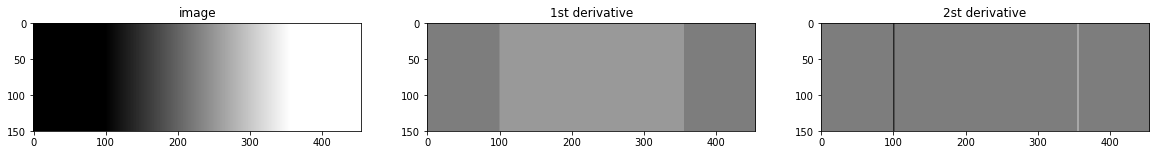

In [30]:
image=np.zeros((150,455))
image[:,356:]=255
summ=0
for x in range(101,356):
    summ=1+summ
    image[:,x]=int(summ)
    
gradientx_kernel=np.array([[-1,0,1],
                           [-1,0,1],
                           [-1,0,1]])

output1 = cv2.filter2D(image,-1,gradientx_kernel,delta = 127)
output2 = cv2.filter2D(output1,-1,-gradientx_kernel,delta = 127)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,60))
ax1.imshow(image, cmap='gray')
ax1.set_title('image')
ax2.imshow(output1, cmap='gray',vmin=100, vmax=155)
ax2.set_title('1st derivative')
ax3.imshow(output2, cmap='gray',vmin=100, vmax=155)
ax3.set_title('2st derivative')
plt.show()
    

### xy gradients

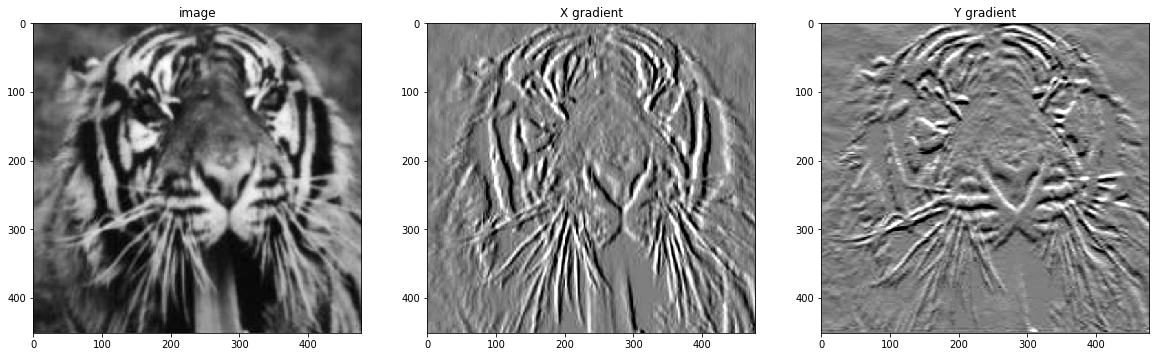

In [31]:
image=mpimg.imread('images/gradient.JPG')
image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

gradientx_kernel=np.array([[-1,0,1],
                           [-1,0,1],
                           [-1,0,1]])
gradienty_kernel=np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
#gradienty_kernel=np.array([[-1],[1]])

outputx = cv2.filter2D(image,-1,gradientx_kernel,delta = 127)
outputy = cv2.filter2D(image,-1,gradienty_kernel,delta = 127)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,60))
ax1.imshow(image, cmap='gray')
ax1.set_title('image')
ax2.imshow(outputx, cmap='gray',vmin=0, vmax=255)
ax2.set_title('X gradient')
ax3.imshow(outputy, cmap='gray',vmin=0, vmax=255)
ax3.set_title('Y gradient')
plt.show()


### derivative of gaussian

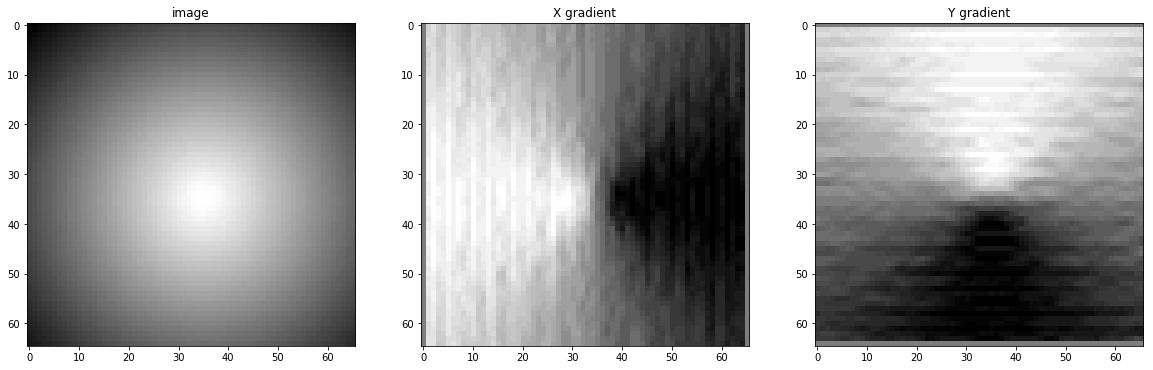

In [32]:
image=mpimg.imread('images/gaussian.jpg')
image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

gradientx_kernel=np.array([[-1,0,1],
                           [-1,0,1],
                           [-1,0,1]])
gradienty_kernel=np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])

outputx = cv2.filter2D(image,-1,gradientx_kernel,delta = 127)
outputy = cv2.filter2D(image,-1,gradienty_kernel,delta = 127)
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,60))
ax1.imshow(image, cmap='gray')
ax1.set_title('image')
ax2.imshow(outputx, cmap='gray',vmin=105, vmax=150)
ax2.set_title('X gradient')
ax3.imshow(outputy, cmap='gray',vmin=105, vmax=150)
ax3.set_title('Y gradient')
plt.show()


### canny

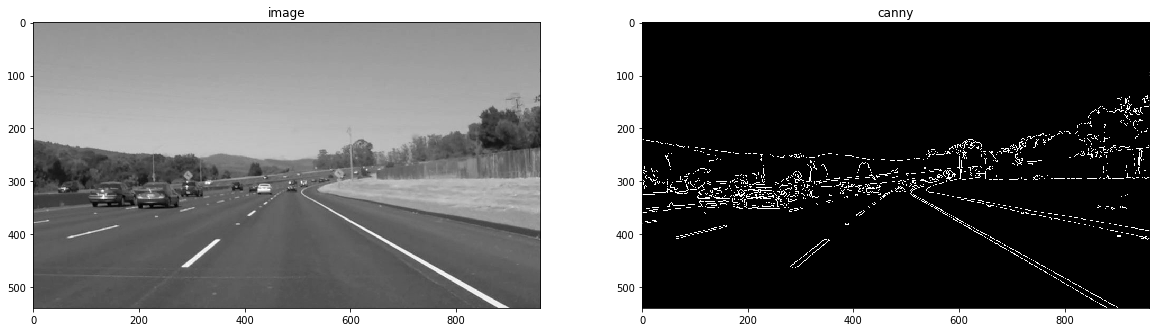

In [33]:
lane=mpimg.imread('images/solidWhiteCurve.jpg')
lane_gray=cv2.cvtColor(lane,cv2.COLOR_RGB2GRAY)

low_threshold= 50
high_threshold=150
edges=cv2.Canny(lane_gray,low_threshold,high_threshold)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,40))
ax1.imshow(lane_gray, cmap='gray')
ax1.set_title('image')
ax2.imshow(edges, cmap='gray',vmin=105, vmax=150)
ax2.set_title('canny')
plt.show()

## Lecture 6 **(Hough Transform)**

### circles

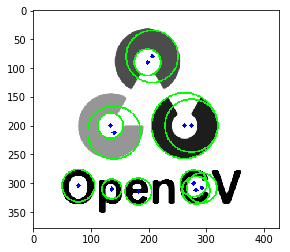

In [34]:
img=mpimg.imread('images/OpenCV_Logo.png')*255
img=np.array(img,dtype=np.uint8)

img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,11,param1=30,param2=30,minRadius=0,maxRadius=0)
    
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg, cmap='gray')
plt.show()

### lines

In [35]:
#region of interrest
mask=np.zeros_like(edges)
mask_replace_color=255
image_shape=lane.shape
vertices=np.array([[(image_shape[1]/2-50,(image_shape[0]/2)+40),(image_shape[1]/2+50,(image_shape[0]/2)+40),(image_shape[1]-40,image_shape[0]-1),(40,image_shape[0]-1)]],dtype=np.int32)
cv2.fillPoly(mask,vertices,mask_replace_color)
mask_edges=cv2.bitwise_and(mask,edges)

7


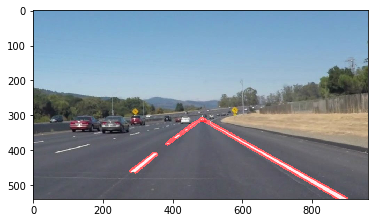

In [36]:
lane=mpimg.imread('images/solidWhiteCurve.jpg')
rho=2
theta=np.pi/180
threshold=100
min_line_length=40
max_line_gap=20
line_image=np.zeros_like(lane)
lines=cv2.HoughLinesP(mask_edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)
print(len(lines))
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
detected_lane=cv2.addWeighted(lane,1,line_image,1,0)
plt.imshow(detected_lane)
plt.show()